In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_EDA_cleaned.csv')

In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [5]:
# Defining x and y

In [6]:
x = df.drop('FWI',axis=1)
y= df['FWI']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [10]:
x_test.shape,x_train.shape

((61, 11), (182, 11))

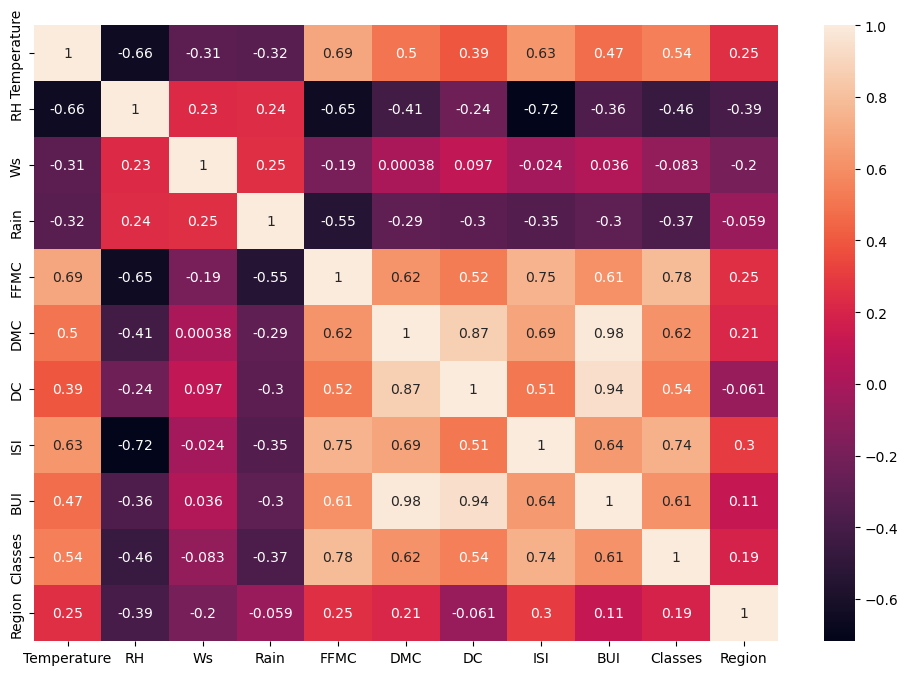

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [12]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [14]:
def remove_corelated(data,threshold):
    corel_set = set()
    corelation_matrix = data.corr()
    for i in range(len(corelation_matrix.columns)):
        for j in range(i):
            print('Compared',corelation_matrix.columns[i],"and", corelation_matrix.columns[j],i,j)
            if abs(corelation_matrix.iloc[i,j])> threshold:
                print('Compared',corelation_matrix.columns[i])
                col_name = corelation_matrix.columns[i]
                corel_set.add(col_name)
    return corel_set


In [15]:
corel_set = remove_corelated(x_train,0.85)

Compared RH and Temperature 1 0
Compared Ws and Temperature 2 0
Compared Ws and RH 2 1
Compared Rain and Temperature 3 0
Compared Rain and RH 3 1
Compared Rain and Ws 3 2
Compared FFMC and Temperature 4 0
Compared FFMC and RH 4 1
Compared FFMC and Ws 4 2
Compared FFMC and Rain 4 3
Compared DMC and Temperature 5 0
Compared DMC and RH 5 1
Compared DMC and Ws 5 2
Compared DMC and Rain 5 3
Compared DMC and FFMC 5 4
Compared DC and Temperature 6 0
Compared DC and RH 6 1
Compared DC and Ws 6 2
Compared DC and Rain 6 3
Compared DC and FFMC 6 4
Compared DC and DMC 6 5
Compared DC
Compared ISI and Temperature 7 0
Compared ISI and RH 7 1
Compared ISI and Ws 7 2
Compared ISI and Rain 7 3
Compared ISI and FFMC 7 4
Compared ISI and DMC 7 5
Compared ISI and DC 7 6
Compared BUI and Temperature 8 0
Compared BUI and RH 8 1
Compared BUI and Ws 8 2
Compared BUI and Rain 8 3
Compared BUI and FFMC 8 4
Compared BUI and DMC 8 5
Compared BUI
Compared BUI and DC 8 6
Compared BUI
Compared BUI and ISI 8 7
Compar

In [16]:
x_train.drop(corel_set, inplace=True, axis=1)
x_test.drop(corel_set, inplace=True, axis=1)

In [17]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29.0,74.0,19.0,0.1,75.8,3.6,2.1,0,0.0
141,31.0,72.0,14.0,0.2,60.2,3.8,0.8,0,1.0
192,40.0,31.0,15.0,0.0,94.2,22.5,16.6,1,1.0
68,32.0,60.0,18.0,0.3,77.1,11.3,2.2,0,0.0
119,32.0,47.0,14.0,0.7,77.5,7.1,1.8,0,0.0
...,...,...,...,...,...,...,...,...,...
106,24.0,82.0,15.0,0.4,44.9,0.9,0.2,0,0.0
14,28.0,80.0,17.0,3.1,49.4,3.0,0.4,0,0.0
92,25.0,76.0,17.0,7.2,46.0,1.3,0.2,0,0.0
179,34.0,59.0,16.0,0.0,88.1,19.5,7.4,1,1.0


In [20]:
scaler = StandardScaler()

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

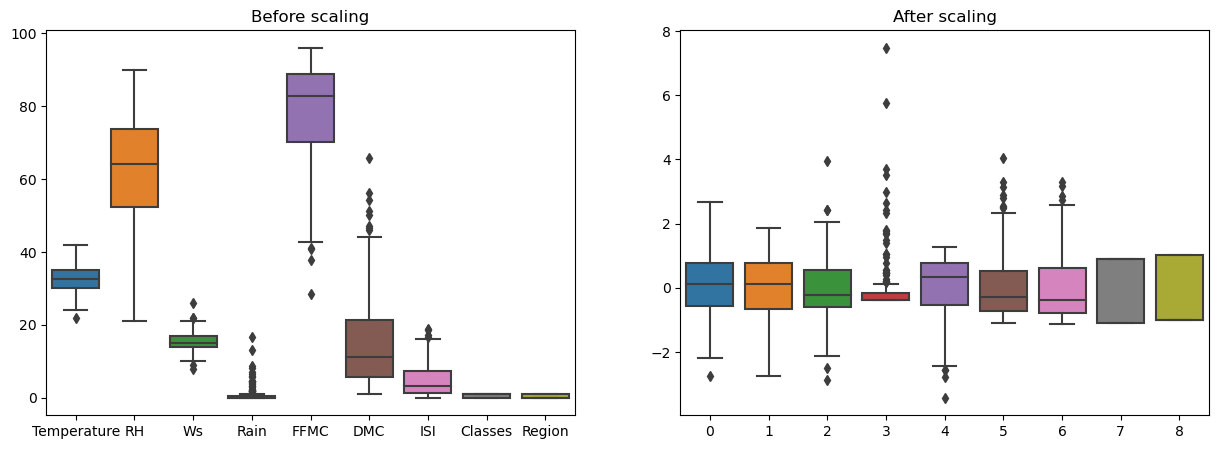

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('After scaling')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(x_test_scaled)

In [29]:
regressor.predict(x_test_scaled)

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
MSE = mean_squared_error(y_test,y_pred=regressor.predict(x_test_scaled))
MAE = mean_absolute_error(y_test,y_pred=regressor.predict(x_test_scaled))
RMSE = np.sqrt(MSE)

In [32]:
MSE,MAE,RMSE

(0.6742766873791584, 0.5468236465249987, 0.8211435242265255)

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2score = r2_score(y_test,y_pred=regressor.predict(x_test_scaled))

In [35]:
updated_r2 = 1- ((1-r2score)*(len(x) - 1)/ (len(x)-9-1))

In [36]:
r2score,updated_r2

(0.9847657384266951, 0.9841772905547649)

In [37]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


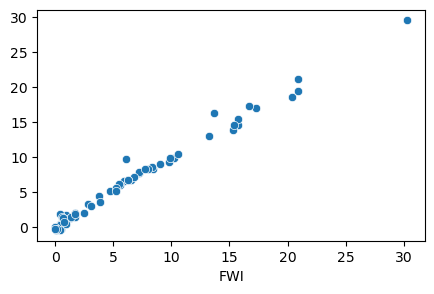

In [38]:
plt.figure(figsize=(5,3))
sns.scatterplot(y_test,y_pred)
plt.show()

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

In [41]:
MSE = mean_squared_error(y_test,y_pred_lasso)
MAE = mean_absolute_error(y_test,y_pred_lasso)
RMSE = np.sqrt(MSE)

r2_scr = r2_score(y_test,y_pred_lasso)

In [42]:
MSE,MAE,RMSE,r2_scr

(2.2483458918974746,
 1.1331759949144085,
 1.4994485292591655,
 0.9492020263112388)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


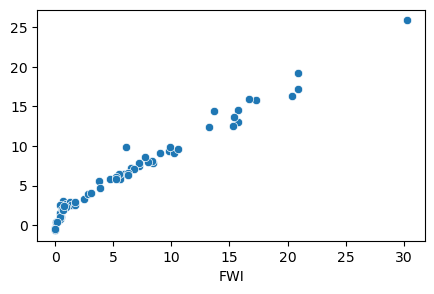

In [43]:
plt.figure(figsize=(5,3))
sns.scatterplot(y_test,y_pred_lasso)
plt.show()

In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

In [45]:
y_pred_ridge

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

In [46]:
MSE = mean_squared_error(y_test,y_pred_ridge)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred_ridge)
r2_scr = r2_score(y_test,y_pred_ridge)

In [47]:
MSE, MAE,RMSE,r2_scr

(0.6949198918152067,
 0.5642305340105693,
 0.8336185529456543,
 0.9842993364555513)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


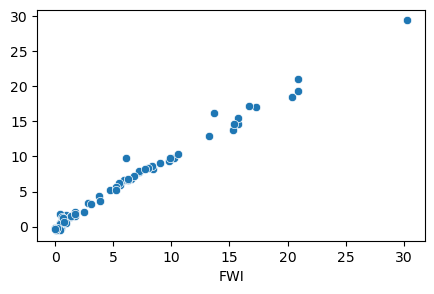

In [48]:
plt.figure(figsize=(5,3))
sns.scatterplot(y_test,y_pred_ridge)
plt.show()

In [49]:
from sklearn.linear_model import ElasticNet

In [50]:
elasticnet = ElasticNet()

In [51]:
elasticnet.fit(x_train_scaled,y_train)
y_pred_elastic = elasticnet.predict(x_test_scaled)

In [52]:
MSE = mean_squared_error(y_test,y_pred_elastic)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred_elastic)
r2_scr = r2_score(y_test,y_pred_elastic)

In [53]:
MSE, MAE,RMSE,r2_scr

(5.517251101025224, 1.8822353634896, 2.3488829474933874, 0.8753460589519703)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


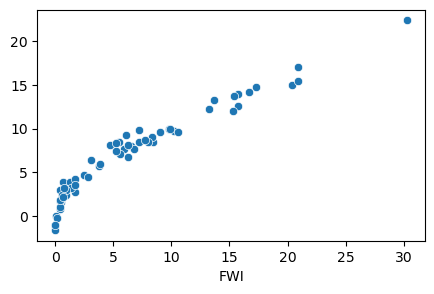

In [54]:
plt.figure(figsize=(5,3))
sns.scatterplot(y_test,y_pred_elastic)
plt.show()

In [57]:
import pickle as pkl


pkl.dump(scaler,open('sklr.pkl','wb'))
pkl.dump(ridge,open('ridge.pkl','wb'))